In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
df = pd.read_csv("flight-data.csv")
print("Total number of rows are: {} \nTotal number of columns are: {}".format(df.shape[0],df.shape[1]))

Total number of rows are: 10000 
Total number of columns are: 25


In [3]:
df.head(5)

,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,temp,...,precip,pressure,visib,type,manufacturer,model,engines,seats,engine,arr_delay
0,B6,1201,N643JB,JFK,FLL,135.0,1069,21,50,73.04,...,0.0,1019.4,10.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,Turbo-fan,1.0
1,DL,1773,N3743H,JFK,LAS,287.0,2248,15,35,71.06,...,0.0,1020.4,10.0,Fixed wing multi engine,BOEING,737-832,2.0,189.0,Turbo-jet,0.0
2,EV,4572,N11107,EWR,GSP,84.0,594,15,9,78.80,...,0.0,NaN,5.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2.0,55.0,Turbo-fan,1.0
3,B6,179,N526JB,JFK,PHX,305.0,2153,17,35,44.06,...,0.0,1009.2,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,US,1733,N162UW,LGA,CLT,78.0,544,7,53,69.98,...,0.0,1021.3,10.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-211,2.0,199.0,Turbo-jet,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier       10000 non-null  object 
 1   flight        10000 non-null  int64  
 2   tailnum       9926 non-null   object 
 3   origin        10000 non-null  object 
 4   dest          10000 non-null  object 
 5   air_time      9716 non-null   float64
 6   distance      10000 non-null  int64  
 7   hour          10000 non-null  int64  
 8   minute        10000 non-null  int64  
 9   temp          9952 non-null   float64
 10  dewp          9952 non-null   float64
 11  humid         9952 non-null   float64
 12  wind_dir      9731 non-null   float64
 13  wind_speed    9951 non-null   float64
 14  wind_gust     2387 non-null   float64
 15  precip        9954 non-null   float64
 16  pressure      8808 non-null   float64
 17  visib         9954 non-null   float64
 18  type          8499 non-null

In [5]:
#target variable
df['arr_delay'].value_counts()

0.0    5732
1.0    3984
Name: arr_delay, dtype: int64

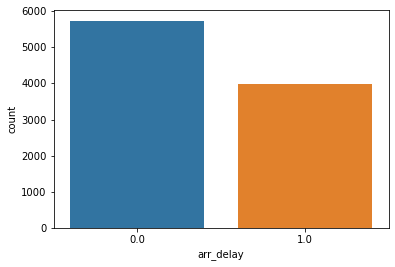

In [6]:
ax = sns.countplot(x="arr_delay",data = df);

In [7]:
count_1_arr_delay = len(df[df['arr_delay']==1])
count_0_arr_delay = len(df[df['arr_delay']==0])
percent_arr_delay_1 = count_1_arr_delay/(count_1_arr_delay + count_0_arr_delay)
percent_arr_delay_0 = count_0_arr_delay/(count_1_arr_delay + count_0_arr_delay)
print("percentage of 1's in arr_delay column: ",percent_arr_delay_1*100)
print("percentage of 0's in arr_delay column: ",percent_arr_delay_0*100)

percentage of 1's in arr_delay column:  41.00452861259778
percentage of 0's in arr_delay column:  58.99547138740222


#### Corelation matrix

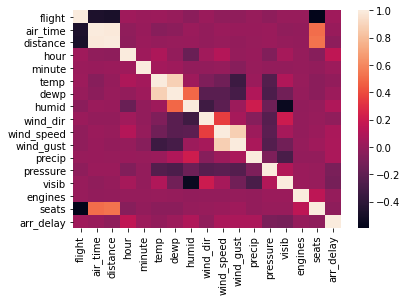

In [8]:
sns.heatmap(df.corr())
plt.show()

#### Scatter matrix for all the columns

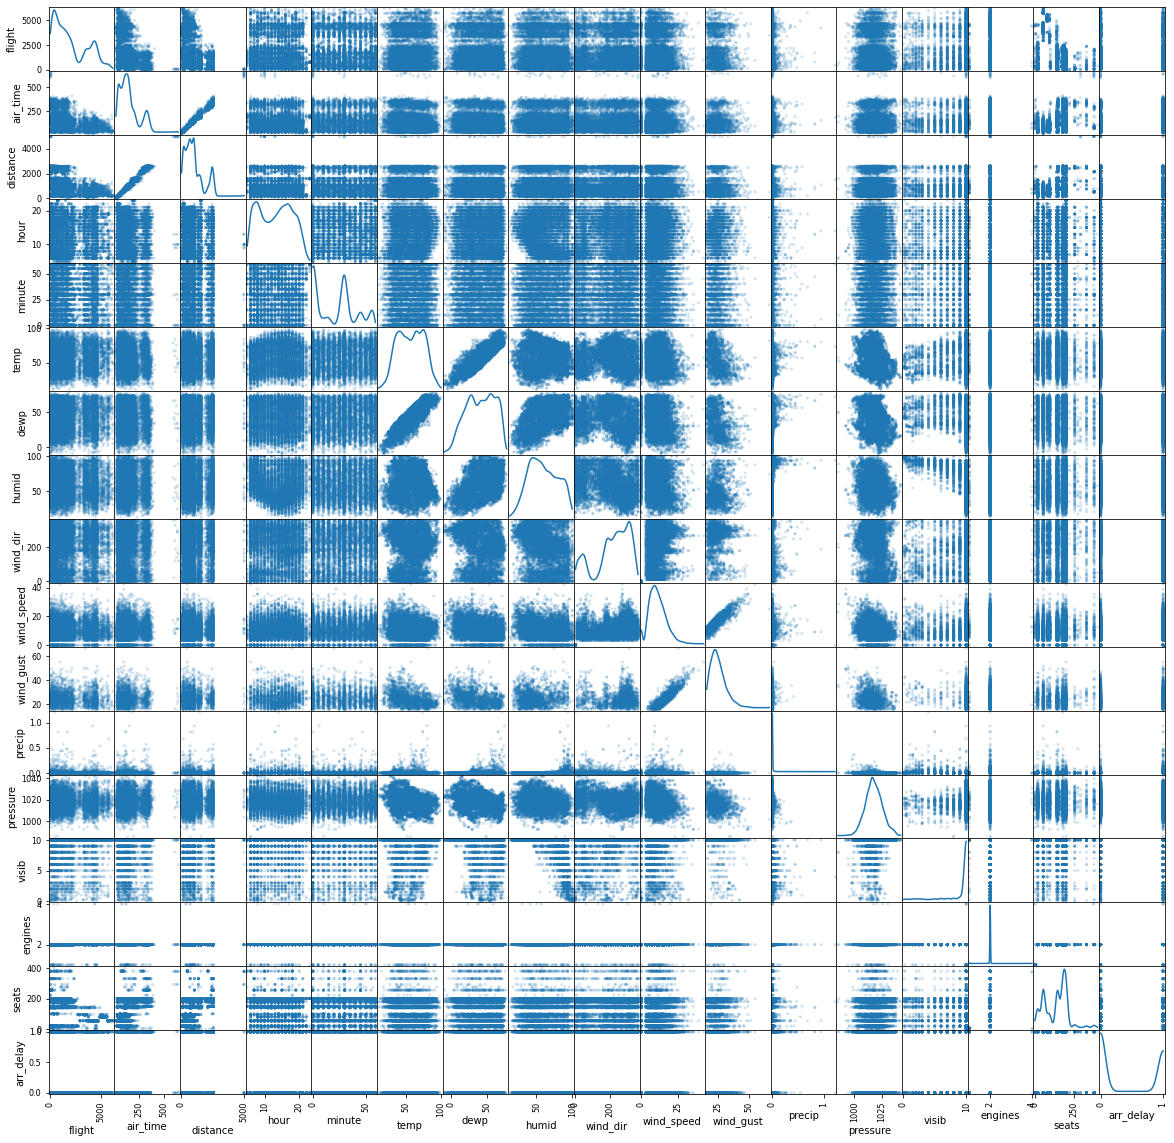

In [9]:
scatter_matrix(df, alpha=0.2, figsize=(20,20), diagonal='kde');

In [10]:
selected_columns = df[["air_time","distance","hour","minute","temp","dewp","humid","wind_dir","wind_speed","wind_gust"
                      ,"precip","pressure","visib","engines","arr_delay"]]
df_new = selected_columns.copy()

In [11]:
df_new.head()

,air_time,distance,hour,minute,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,engines,arr_delay
0,135.0,1069,21,50,73.04,66.92,81.14,160.0,13.80936,19.56326,0.0,1019.4,10.0,2.0,1.0
1,287.0,2248,15,35,71.06,42.98,36.28,230.0,14.96014,NaN,0.0,1020.4,10.0,2.0,0.0
2,84.0,594,15,9,78.80,69.80,73.95,200.0,8.05546,NaN,0.0,NaN,5.0,2.0,1.0
3,305.0,2153,17,35,44.06,14.00,29.23,270.0,17.26170,24.16638,0.0,1009.2,10.0,NaN,1.0
4,78.0,544,7,53,69.98,53.96,56.78,230.0,6.90468,NaN,0.0,1021.3,10.0,2.0,0.0


In [12]:
df_new.isnull().sum()

air_time       284
distance         0
hour             0
minute           0
temp            48
dewp            48
humid           48
wind_dir       269
wind_speed      49
wind_gust     7613
precip          46
pressure      1192
visib           46
engines       1501
arr_delay      284
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_new[['arr_delay']] = imputer.fit_transform(df_new[['arr_delay']])

In [14]:
df_new = df_new.fillna(df_new.median())

In [15]:
from sklearn.impute import SimpleImputer

num_vars = df_new[[x for x in df_new.columns if x != 'arr_delay']].columns
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())])
processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars)])

### Training and test splits

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def generate_splits():
    y = df_new['arr_delay']
    X = df_new[[x for x in df_new.columns if x != 'arr_delay']]
    return train_test_split(X, y, test_size=0.2)

X_train, X_test, y_train, y_test = generate_splits()

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 8,000
Test examples: 2,000


### Logistic regression

In [17]:
modeling_pipeline_logistic = Pipeline([('data_processing', processing_pipeline),
                            ('logreg', LogisticRegression(solver='liblinear'))])
modeling_pipeline_logistic

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  Index(['air_time', 'distance', 'hour', 'minute', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'engines'],
      dtype='object'))])),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'logreg__C':[0.01, 0.1, 1, 10,100]}]

gcv_results_logistic = GridSearchCV(estimator= modeling_pipeline_logistic, param_grid=param_grid, scoring='roc_auc', refit = True, cv = 10)
gcv_results_logistic = gcv_results_logistic.fit(X_train, y_train)


In [19]:
print(f'The best score for logistic regression using GCV train data is: {gcv_results_logistic.best_score_:.2%}')      

The best score for logistic regression using GCV train data is: 68.41%


In [20]:
lr_pred = gcv_results_logistic.predict(X_test)
print(f'The best score for logistic regression using GCV Test data is: {gcv_results_logistic.score(X_test, y_test):.2%}')

The best score for logistic regression using GCV Test data is: 68.61%


### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
modeling_pipeline_dt = Pipeline([('data_processing', processing_pipeline),
                                ('dt', DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=1))])

In [23]:
param_grid_dt = [{'dt__max_depth': [2, 5, 10, 15, 20],
   'dt__min_samples_split':[3, 5, 10, 20, 40],
   'dt__min_samples_leaf': [2, 5],
   'dt__class_weight':[None] }]

In [24]:
gcv_results_dt = GridSearchCV(estimator=modeling_pipeline_dt, 
                           param_grid=param_grid_dt, scoring='roc_auc', refit=True, cv = 10)
gcv_results_dt = gcv_results_dt.fit(X_train, y_train)

In [25]:
print(f'The best score for Decision tree regression using GCV Train data is: {gcv_results_dt.best_score_:.2%}')

The best score for Decision tree regression using GCV Train data is: 64.09%


In [26]:
dt_pred = gcv_results_dt.predict(X_test)
print(f'The best score for Decision tree regression using GCV Test data is: {gcv_results_dt.score(X_test, y_test):.2%}')

The best score for Decision tree regression using GCV Test data is: 66.02%


### Support Vector machine

In [27]:
from sklearn import svm
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

In [28]:
modeling_pipeline_svm = Pipeline([('data_processing', processing_pipeline),
                                       ('model',SVC(probability= True))])
param_grid_svm = [{'model__C': [0.01, 0.1, 1, 10], 'model__kernel': ['linear']}]

In [29]:
svm_results = GridSearchCV(estimator=modeling_pipeline_svm, param_grid=param_grid_svm, scoring='roc_auc', refit =True, cv =10)
svm_results = svm_results.fit(X_train, y_train)

In [30]:
print(f'The best score for SVM using GCV Train data is: {svm_results.best_score_:.2%}')

The best score for SVM using GCV Train data is: 68.13%


In [31]:
svm_pred = svm_results.predict(X_test)
print(f'The best score for SVM using GCV Test data is: {svm_results.score(X_test, y_test):.2%}')

The best score for SVM using GCV Test data is: 67.57%


#### Conclusion 1
Out of the three different models we have run in this code logistic regression has better performance of the three with a predictability of 68.61 percent.

### Ensemble technique

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

ems = [('lr', modeling_pipeline_logistic),('dt', modeling_pipeline_dt),('model', modeling_pipeline_svm)]
voting_classifier = VotingClassifier(estimators= ems, weights=None, voting='soft')

scores = cross_val_score(estimator=voting_classifier, X=X_test, y=y_test, cv=10, scoring='roc_auc')
print(f'ROC AUC {scores.mean():.2f} (+/- {scores.std():.2f}) [Ensemble]')

ROC AUC 0.69 (+/- 0.03) [Ensemble]


#### Conclusion 2
Running ensemble definetly improved the performance of the estimator by a marginal value as it has a prediction rate of 69 percent whereas logistic regression individually had 68.61 percent.

### AdaBoost

#### ADABoost using default classifier(Decision tree)

In [56]:
xt = processing_pipeline.fit_transform(X_train)
params = {'base_estimator__max_depth': [1,2],
         'n_estimators': [50, 100, 200, 400]}
ABC = AdaBoostClassifier(DecisionTreeClassifier())
ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='roc_auc')
ad_gscv = ad_gscv.fit(xt, y_train)
print(f'Validation score: {ad_gscv.best_score_:.2%}')
xtt = processing_pipeline.transform(X_test)
ad_pred = ad_gscv.predict(xtt)
print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

Validation score: 71.40%
Test score: 72.48%


#### ADABoost for Logistic Regression

In [57]:
params = [{'base_estimator__C':[0.01, 0.1, 1, 10,100]}]
ABC = AdaBoostClassifier(base_estimator=LogisticRegression(solver='liblinear'))
ad_gscv = GridSearchCV(ABC, param_grid = params, cv=10, scoring='roc_auc')
ad_gscv = ad_gscv.fit(xt, y_train)
print(f'Validation score: {ad_gscv.best_score_:.2%}')
xtt = processing_pipeline.transform(X_test)
ad_pred = ad_gscv.predict(xtt)
print(f'Test score: {ad_gscv.score(xtt, y_test):.2%}')

Validation score: 67.99%
Test score: 68.06%


#### Conclusion 3
1. When we are running the adaboost with default one of decision tree classifier it shows improvement by almost 6 percent where adaboost on decision tree has a score of 72.48% whereas normal grid search cv using decision tree is 66.02%. 
2. When we are running the adaboost with logistic regression our score is 68.06% and normal logistic regression with grid search cv gave a result of 68.61% which clearly shows that there no improvement for logistic regression.